In [1]:

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
season = '2020-21'
path = './player/{}.xlsx'.format(season)
data = pd.read_csv(path)
data.head()

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS
0,203932,Aaron Gordon,Aaron,1610612743,DEN,25.0,50,29,21,0.580,...,124,228,79,136,139,115,115,17,5,"203932,1610612743"
1,1628988,Aaron Holiday,Aaron,1610612754,IND,24.0,66,30,36,0.455,...,167,335,283,276,228,338,178,29,5,"1628988,1610612754"
2,1630174,Aaron Nesmith,Aaron,1610612738,BOS,21.0,46,22,24,0.478,...,339,198,411,382,250,399,245,29,5,"1630174,1610612738"
3,1627846,Abdel Nader,Abdel,1610612756,PHX,27.0,24,16,8,0.667,...,309,341,216,302,143,348,245,29,5,"1627846,1610612756"
4,1629690,Adam Mokoka,Adam,1610612741,CHI,22.0,14,3,11,0.214,...,482,518,524,518,280,525,245,29,5,"1629690,1610612741"


In [3]:
season = '2020-21'
path = './team/{}.xlsx'.format(season)
team_data = pd.read_csv(path)
team_data.head()

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS
0,1610612737,Atlanta Hawks,72,41,31,0.569,48.3,40.8,87.2,0.468,...,9,24,17,17,18,9,13,9,10,Atlanta Hawks
1,1610612738,Boston Celtics,72,36,36,0.500,48.3,41.5,88.9,0.466,...,16,13,6,11,24,13,16,13,10,Boston Celtics
2,1610612751,Brooklyn Nets,72,48,24,0.667,48.3,43.1,87.3,0.494,...,13,27,7,9,13,18,2,7,10,Brooklyn Nets
3,1610612766,Charlotte Hornets,72,33,39,0.458,48.2,39.9,87.8,0.455,...,24,10,16,14,5,21,23,23,10,Charlotte Hornets
4,1610612741,Chicago Bulls,72,31,41,0.431,48.3,42.2,88.6,0.476,...,27,28,27,18,10,30,21,20,10,Chicago Bulls


### q2.define feaatrue

In [4]:
Basic = data[['PLAYER_ID', 'PLAYER_NAME', 'AGE', 'TEAM_ABBREVIATION', 'W', 'L', 'MIN']]
Offence = data[['PTS', 'FGM', 'FGM_RANK']]
Defense = data[['REB', 'STL', 'BLK']]
Organization = data[['AST']]
negative = data[['PF', 'TOV']]
Basic.head()

,PLAYER_ID,PLAYER_NAME,AGE,TEAM_ABBREVIATION,W,L,MIN
0,203932,Aaron Gordon,25.0,DEN,29,21,27.7
1,1628988,Aaron Holiday,24.0,IND,30,36,17.8
2,1630174,Aaron Nesmith,21.0,BOS,22,24,14.5
3,1627846,Abdel Nader,27.0,PHX,16,8,14.8
4,1629690,Adam Mokoka,22.0,CHI,3,11,4.0


### q3

In [5]:
class Team:
    def __init__(self,season='2020-21',team_name = "DEN"):
        self.data = pd.read_csv('./player/{}.xlsx'.format(season))
        self.team_data = pd.read_csv('./team/{}.xlsx'.format(season)) 
        self.team_name = team_name
        self.favorite_team = self.select_team()
        self.high_win_team = self.high_team()
        self.high_loss_team = self.min_team()
        
    def select_team(self):
        return self.data[self.data['TEAM_ABBREVIATION'] == self.team_name]
    
    def high_team(self):
        return self.team_data[self.team_data['W_PCT'] == np.max(self.team_data['W_PCT'])].TEAM_ID.tolist()[0]
    
    def min_team(self):
        return self.team_data[self.team_data['W_PCT'] == np.min(self.team_data['W_PCT'])].TEAM_ID.tolist()[0]
    
    def return_team(self, mode):
        if mode == 'high':
            return self.data[self.data['TEAM_ID'] == self.high_win_team]
        return self.data[self.data['TEAM_ID'] == self.high_loss_team]
    
    def return_team2(self, mode):
        if mode == 'high':
            return self.data[self.data['TEAM_ID'] == self.high_win_team]
        return self.data[self.data['TEAM_ID'] == self.high_loss_team]
    
    def cos_sim(self, a, b):
        # a_norm = np.linalg.norm(np.array(a))
        # b_norm = np.linalg.norm(np.array(b))
        # cos = np.dot(a,b)/(a_norm * b_norm)
        cos = np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))
        return cos
    
    @property
    def simlarity_matrix(self):
        matrix = pd.concat([self.favorite_team, self.return_team(mode='high'), self.return_team( mode='loss')])
        matrix = matrix[['PLAYER_NAME', 'AGE', 'W', 'L', 'MIN', 'PTS', 'FGM', 'FGM_RANK', 'REB', 'STL', 'BLK', 'AST', 'PF', 'TOV']]
        matrix_dict = {}
        for ele in matrix.iterrows():
            matrix_dict[ele[1][0]] = ele[1][1:].tolist()
        players = [k for k,v in matrix_dict.items()]    
        sim_matrix = []
        for player in players:
            cur_sim = []
            for _,v in matrix_dict.items():
                dis = self.cos_sim(matrix_dict[player],v)
                cur_sim.append(round(dis, 2))
            sim_matrix.append(cur_sim)
        return pd.DataFrame(sim_matrix, columns=players, index=players)
    
    def sim_matrix_per_team(self):
        matrix = self.select_team()
        matrix = matrix[['PLAYER_NAME', 'AGE', 'W', 'L', 'MIN', 'PTS', 'FGM', 'FGM_RANK', 'REB', 'STL', 'BLK', 'AST', 'PF', 'TOV']]
        matrix_dict = {}
        for ele in matrix.iterrows():
            matrix_dict[ele[1][0]] = ele[1][1:].tolist()
        players = [k for k,v in matrix_dict.items()]    
        sim_matrix = {}
        for player in players:
            cur_sim = {}
            for _,v in matrix_dict.items():
                dis = self.cos_sim(matrix_dict[player],v)
                cur_sim[_] = round(dis, 2)
            sim_matrix[player] = cur_sim
        return sim_matrix

### Q4 See Result in DataGrip

### Q5 Define 3 teams: your favorite team, high-performing team, and poorly performed team

In [6]:
"""
    params:
        mode: high ->  high-performing team
            loss ->  poorly performed team
        team_name: choose a team you favorite
    return: DataFrame for one team
"""
team = Team(team_name='BKN')
favorite_team = team.favorite_team
team = Team()
high_win_team = team.return_team(mode ='high')
team = Team()
high_loss_team = team.return_team(mode ='loss')

#### Q6 For each season, create a similarity matrix based on player stats for the 3 teams selected, e.g.similarity can be measured using Euclidean distance to calculate the difference among each players.

In [7]:
team = Team(team_name='BKN')
sim_matrix = team.simlarity_matrix

### Q7. 
#### Using Kruskal’s algorithm to construct a minimum spanning tree (MST) based on the similaritymatrix. You will have N MSTs for N seasons for each team.

In [8]:
def kruskal(graph):
    assert type(graph)==dict

    nodes = graph.keys()   
    visited = set()
    path = []
    next = None

    while len(visited) < len(nodes):
        distance = float('inf') 
        for s in nodes:
            for d in nodes:
                if s in visited and d in visited or s == d:
                    continue
                if graph[s][d] < distance:
                    distance = graph[s][d]
                    pre = s
                    next = d

        path.append((pre, next))
        visited.add(pre)
        visited.add(next)

    return path

In [9]:
sims = {}
for team in data['TEAM_ABBREVIATION'].tolist():
    cur_team = {}
    for season in ['2018-19', '2019-20', '2020-21']:
        teams = Team(season=season ,team_name=team)
        sim = teams.sim_matrix_per_team()
        cur_team[season] = kruskal(sim)
    sims[team] = cur_team

### Q8. Plot the MSTs of your favorite team for each season.

In [11]:
team = 'BKN'

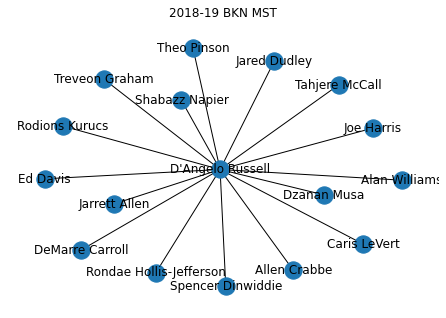

In [12]:
nx.draw(nx.Graph(sims[team]['2018-19']), with_labels=True)
plt.title('2018-19 {} MST'.format(team))
plt.savefig('./plot/2018-19.png')
plt.show()

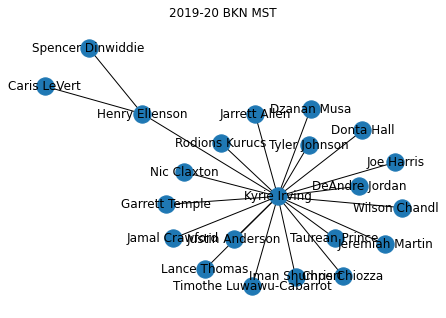

In [13]:
nx.draw(nx.Graph(sims[team]['2019-20']), with_labels=True)
plt.title('2019-20 {} MST'.format(team))
plt.savefig('./plot/2019-20.png')
plt.show()

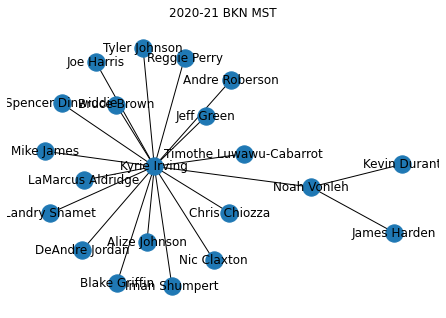

In [14]:
nx.draw(nx.Graph(sims[team]['2020-21']), with_labels=True)
plt.title('2020-21 {} MST'.format(team))
plt.savefig('./plot/2020-21.png')
plt.show()

### 9. Calculate the average weighted degree and average distance of each MST.

In [15]:
mst4eachTeam = {}
for teams, season_dict in sims.items():
    cur_team = {}
    for season, graph in season_dict.items():
        team = Team(season = season, team_name = teams)
        matrix_dict = team.sim_matrix_per_team()
        t = []
        for ele in kruskal(matrix_dict):
            t.append((ele[0], ele[1], matrix_dict[ele[1]][ele[0]]))
        mean_weight = round(np.array([ele[2] for ele in t]).mean(), 3)
        G = nx.Graph()
        G.add_weighted_edges_from(t)
        gen = nx.all_pairs_shortest_path(G)
        dis = []
        for k, v in dict(gen).items():
            for k1, v1 in v.items():
                cur_num = 0
                for player in v1:
                    cur_num += matrix_dict[player][k1]
                dis.append(cur_num)
        dis = round(np.array(dis).mean(), 3)
        cur_team[season] = {}
        cur_team[season]['dis'] = dis
        cur_team[season]['weight'] = mean_weight
    mst4eachTeam[teams] = cur_team

### Q10. Plot the average weighted degree for the 3 teams across all seasons.

In [16]:
teams = ['BKN', 'BOS', 'CHI']
seasons = ['2018-19', '2019-20', '2020-21']

In [17]:
plot_data = []
for season in seasons:
    cur_season = []
    for team in teams:
        cur_weight = mst4eachTeam[team][season]['weight']
        cur_season.append(cur_weight)
    plot_data.append(cur_season)

In [18]:
plot_data

[[0.544, 0.441, 0.498], [0.26, 0.438, 0.373], [0.26, 0.316, 0.297]]

In [19]:
import pyecharts

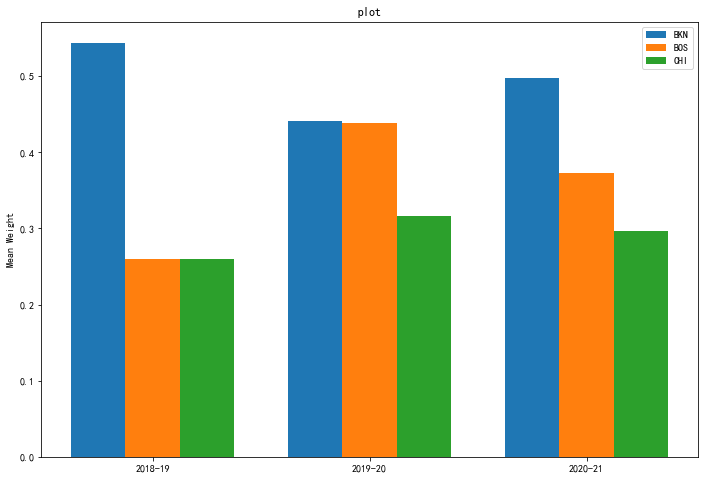

In [24]:
plt.rcParams['font.family']='SimHei'
plt.figure(figsize=(40, 8))
plt.subplot(132)
x = np.arange(len(teams))
width = 0.25
plt.bar(x - width, plot_data[0], width, label=teams[0])
plt.bar(x, plot_data[1], width, label=teams[1])
plt.bar(x + width, plot_data[2], width, label=teams[2])
plt.ylabel('Mean Weight')
plt.title('plot')
plt.xticks(x, labels=seasons)
plt.legend()
# plt.savefig('./plot/threeTeam.jpg')
plt.show()

# Analyse
### 1.The minimum spanning tree reflects the level differences among the players of a particular team. The closer the average weight is to 1, the closer the average strength of the team is
### 2.The average weight of The Brooklyn Nets is relatively high, indicating that the overall level is relatively close. In recent year, the average level of the Nets is relatively close due to the large number of injuries, the absence of Kevin Durant and Kyrie Irving, and the role players who occupy a large amount of playing time
### 3.The Bulls had lavine's breakout season in 18-19, when average numbers skyrocketed, leading to a big gap in performance with role players and a lower average weight